<a href="https://www.kaggle.com/code/sanjanchaudhari/facebook-analysis?scriptVersionId=137331505" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/facebook-dataset/FB.csv


In [2]:
fb=pd.read_csv("/kaggle/input/facebook-dataset/FB.csv")
fb.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-12-31,54.119999,54.860001,53.910000,54.650002,54.650002,43076200
1,2014-01-02,54.830002,55.220001,54.189999,54.709999,54.709999,43195500
2,2014-01-03,55.020000,55.650002,54.529999,54.560001,54.560001,38246200
3,2014-01-06,54.419998,57.259998,54.049999,57.200001,57.200001,68852600
4,2014-01-07,57.700001,58.549999,57.220001,57.919998,57.919998,77207400


In [3]:
fb.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [4]:
fb.info

<bound method DataFrame.info of             Date        Open        High         Low       Close   Adj Close  \
0     2013-12-31   54.119999   54.860001   53.910000   54.650002   54.650002   
1     2014-01-02   54.830002   55.220001   54.189999   54.709999   54.709999   
2     2014-01-03   55.020000   55.650002   54.529999   54.560001   54.560001   
3     2014-01-06   54.419998   57.259998   54.049999   57.200001   57.200001   
4     2014-01-07   57.700001   58.549999   57.220001   57.919998   57.919998   
...          ...         ...         ...         ...         ...         ...   
1254  2018-12-24  123.099998  129.740005  123.019997  124.059998  124.059998   
1255  2018-12-26  126.000000  134.240005  125.889999  134.179993  134.179993   
1256  2018-12-27  132.440002  134.990005  129.669998  134.520004  134.520004   
1257  2018-12-28  135.339996  135.919998  132.199997  133.199997  133.199997   
1258  2018-12-31  134.449997  134.639999  129.949997  131.089996  131.089996   

       

In [5]:
fb.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [6]:
fb.index

RangeIndex(start=0, stop=1259, step=1)

In [7]:
fb = fb.replace(',', '', regex=True)

In [8]:
# Convert columns from string to integer
fb['Open'] = fb['Open'].astype(int)
fb['High'] = fb['High'].astype(int)
fb['Low'] = fb['Low'].astype(int)
fb['Close'] = fb['Close'].astype(int)
fb['Adj Close'] = fb['Adj Close'].astype(int)

In [9]:
fb['Profit'] = fb['Close'] - fb['Open']
fb

,Date,Open,High,Low,Close,Adj Close,Volume,Profit
0,2013-12-31,54,54,53,54,54,43076200,0
1,2014-01-02,54,55,54,54,54,43195500,0
2,2014-01-03,55,55,54,54,54,38246200,-1
3,2014-01-06,54,57,54,57,57,68852600,3
4,2014-01-07,57,58,57,57,57,77207400,0
...,...,...,...,...,...,...,...,...
1254,2018-12-24,123,129,123,124,124,22066000,1
1255,2018-12-26,126,134,125,134,134,39723400,8
1256,2018-12-27,132,134,129,134,134,31202500,2
1257,2018-12-28,135,135,132,133,133,22627600,-2


In [10]:
fb.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Profit'],
      dtype='object')

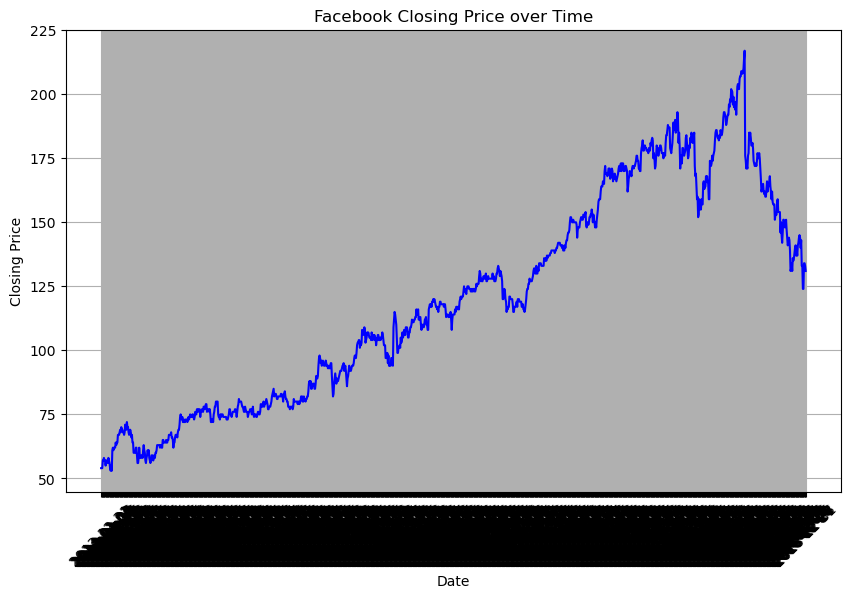

In [11]:
plt.figure(figsize=(10, 6))
plt.plot(fb['Date'], fb['Close'], color='blue')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Facebook Closing Price over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


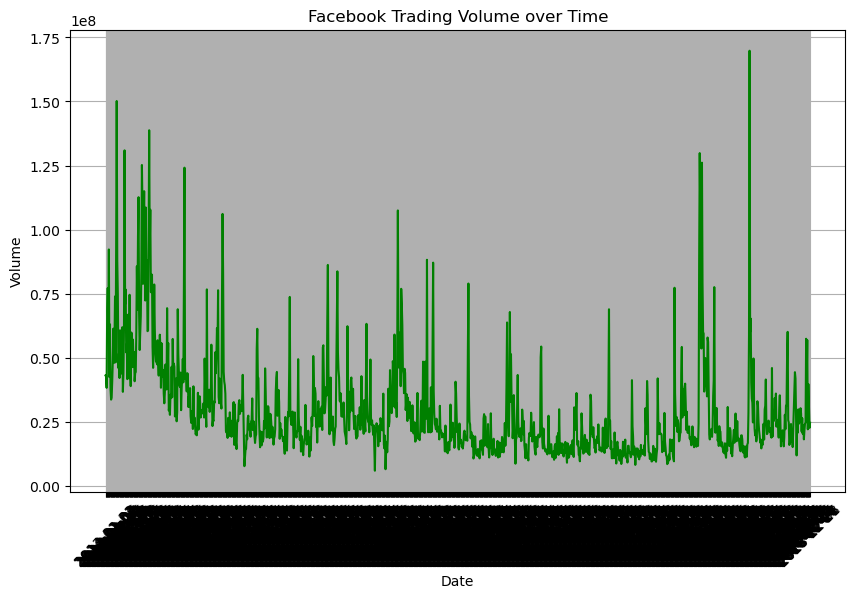

In [12]:
plt.figure(figsize=(10, 6))
plt.plot(fb['Date'], fb['Volume'], color='green')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Facebook Trading Volume over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()